#Dell

## О компании
Dell - это американская технологическая компания, основанная в 1984 году Майклом Деллом. Она специализируется на производстве компьютеров, ноутбуков, серверов, хранилищ данных и другой компьютерной техники. Dell также предоставляет услуги в области информационных технологий и облачных вычислений. Компания знаменита своим прямым методом продаж, когда товары продаются напрямую потребителям без посредников.

## Метаданные

| Имя колонки  | Тип | Описание                                                                             |
|--------------|-----|--------------------------------------------------------------------------------------|
| TV           | str | Бюджет на телевизионное рекламное размещение (низкий, средний или высокий)          |
| Radio        | int | Бюджет на радиорекламу (в млн.)                                                      |
| Social Media | int | Бюджет на продвижение в социальных сетях (в млн.)                                    |
| Influencer   | str | С какими категориями блогеров взаимодействовала акция (Mega, Macro, Nano, или Micro) |
| Sales        | int | Итого от продаж (в млн.)                                                             |


**572 строки** – каждая строка представляет собой отдельный бюджет на рекламу

**5 колонок**

## Цель проекта

Необходимо изучить взаимосвязь между бюджетом рекламы на радио и продажами. Данные, которые предоставлены, включают информацию о маркетинговых кампаниях на разных платформах и доходах от этих кампаний, задача - проанализировать эту информацию, чтобы выявить любые закономерности и предоставить выводы.

## Этап 1: Импорт
- Импорт библиотек
- Загрузка набора данных

### Импорт библиотек

In [ ]:
# Импорт необходимых пакетов

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

### Загрузка набора данных

In [ ]:
# # Загрузка данных из файла с именем 'marketing_sales_data.csv'

data = pd.read_csv("marketing_sales_data.csv")

## Этап 2. Исследование данных
- Понимание переменных
- Очистка набора данных (недостающие данные, избыточные данные, отклонения)
- Визуализация

### Вывод основной информации о данных

In [ ]:
# Вывод первых 10 строк данных

data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


Данные включают в себя следующую информацию:
- Бюджет на продвижение на телевидении (выраженный как «Low», «Medium» или «High»)
- Бюджет на рекламу на радио (в миллионах)
- Бюджет на рекламу в социальных сетях (в миллионах)
- Тип блогеров, с которым сотрудничает компания (выраженный как  "Mega", "Macro", "Micro" or «Nano»).
  - У мега-блогеров более 1 миллиона подписчиков
  - У макро-блогеров — от 100 000 до 1 миллиона подписчиков
  - У микро-блогеров — от 10 000 до 100 000 подписчиков
  - У нано-блогеров — менее 10 000 подписчиков.
- Общий объем продаж (в миллионах)

Чтобы понять, насколько велики данные, определите количество строк и количество столбцов в данных.

In [ ]:
# Отображение количества строк, количества столбцов

data.shape

(572, 5)

В данных 572 строки и 5 столбцов.

Один из способов интерпретировать это состоит в том, что в данных представлены 572 компании, а также 5 аспектов каждой компании, которые показывают, как они продвигают свои продукты/услуги и объемы продаж, полученные в результате их рекламы.

Теперь проверим наличие пропущенных значений в строках данных. Это важно, поскольку пропущенные значения не имеют большого значения при моделировании взаимосвязи между двумя переменными. Для этого начнем с получения логических значений, указывающих, отсутствует ли каждое значение в данных. Затем проверим столбцы и строки на наличие пропущенных значений.

In [ ]:
# Проверка на наличие пропущенных значений

data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [ ]:
# Проверка на наличие пропущенных значений (по оси 1)

data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [ ]:
# Вывод общего количество строк в которых есть хотя бы одно пропущенное значение
data.isna().any(axis=1).sum()

3

Существует 3 строки, содержащие пропущенные значения, что не так много, учитывая общее количество строк. Целесообразно отбросить эти строки, содержащие пропущенные значения, чтобы продолжить подготовку данных к моделированию.

### Удаление строк, содержащих пропущенные значения

Это важный шаг в очистке данных, поскольку он делает их более пригодными для анализа и регрессии, которые будут проводиться далее.

In [ ]:
# Удаление строк, содержащих хотя бы одно пропущенное значение
data = data.dropna(axis=0)

In [ ]:
# Вывод общего количество строк в которых есть хотя бы одно пропущенное значение

data.isna().any(axis=1).sum()

0

### График парных связей в данных
Это поможет нам визуализировать взаимосвязи между переменными в данных и проверить предположения модели.

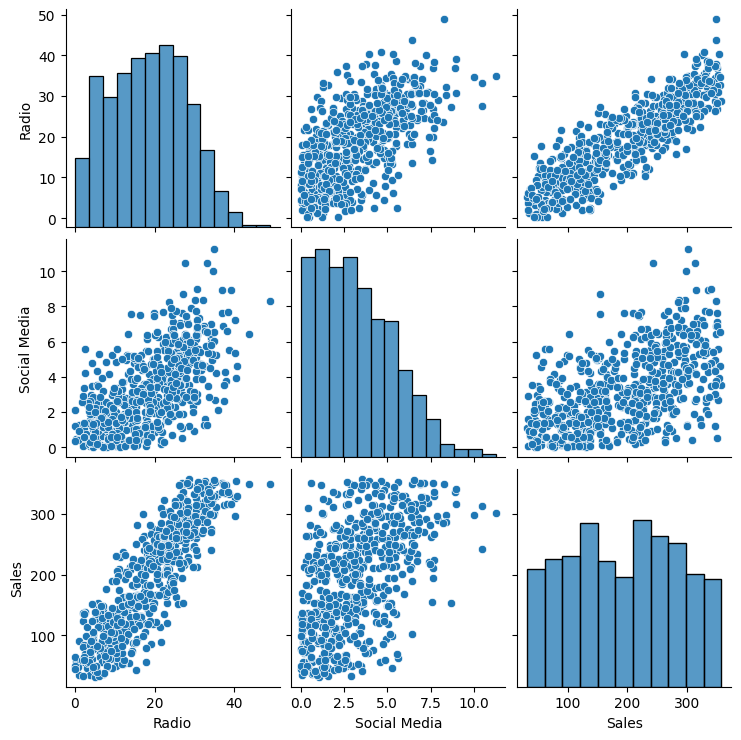

In [ ]:
# Создание графика парных отношений

sns.pairplot(data)

На диаграмме рассеяния показателя "Продажи по радио" точки группируются вокруг линии, что указывает на положительную связь между этими двумя переменными. Поскольку точки группируются вокруг линии, предположение о линейности выполняется.

## Этап 3. Построение модели

#### Подготовка данных

Начнем с выбора только тех столбцов, которые необходимы для модели, которую будем строить на основе данных.

In [ ]:
# Выбор соответствующих столбцов
# Сохранение полученного DataFrame в отдельной переменной для подготовки к регрессии

ols_data = data[["Radio", "Sales"]]

In [ ]:
# Вывод первых 10 строк нового набора данных, чтобы убедиться в его точности

ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


Напишем формулу линейной регрессии для моделирования связи между двумя интересующими переменными.

In [ ]:
# Запись формулы линейной регрессии
# Сохранение ее в переменной

ols_formula = "Sales ~ Radio"

### Метод обыкновенных наименьших квадратов (OLS) для линейной регрессии

In [ ]:
# Внедрение OLS

OLS = ols(formula = ols_formula, data = ols_data)

### Создание модели линейной регрессии для данных

In [ ]:
# Настройка модели под данные
# Сохранение настроенной модели в переменной

model = OLS.fit()

## Этап 4. Результаты и оценка

### Вывод результатов модели

In [ ]:
# Отображение результатов

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          2.07e-176
Time:                        15:27:58   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

На основе этой таблицы определим коэффициенты, которые, по определению модели, будут генерировать линию наилучшего соответствия, причем коэффициенты в данном случае представляют собой точку пересечения оси Y и наклон.

- Пересечение оси Y составляет 41,5326
- Наклон 8.1733

Продажи = 8,1733 * бюджет продвижения на радио + 41,5326

Теперь, когда мы построили модель линейной регрессии и настроили ее к данным, мы можем завершить проверку предположений модели.

### Создание графика данных OLS с наилучшим соответствием линии регрессии

<Axes: xlabel='Radio', ylabel='Sales'>

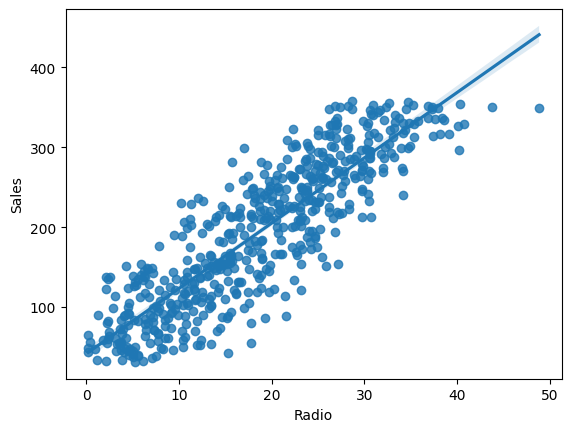

In [ ]:
# Создание графика данных OLS с наилучшим соответствием линии регрессии

sns.regplot(x = "Radio", y = "Sales", data = ols_data)

Приведенный график регрессии иллюстрирует приблизительно линейную зависимость между двумя переменными, а также линию наилучшего соответствия. Это подтверждает предположение о линейности.

### Проверка предположения о нормальности

Для начала получим остатки от модели.

In [ ]:
# Получение остатков по модели

residuals = model.resid

Визуализируем распределение остатков.

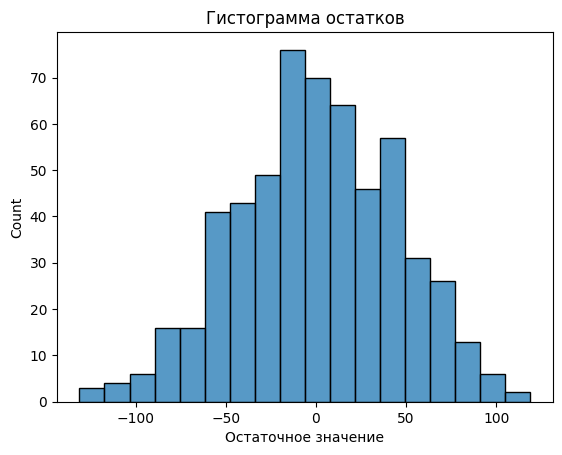

In [ ]:
# Визуализация распределения остатков

fig = sns.histplot(residuals)
fig.set_xlabel("Остаточное значение")
fig.set_title("Гистограмма остатков")
plt.show()

Судя по предыдущей визуализации, распределение остатков приблизительно нормально. Это говорит о том, что предположение о нормальности, скорее всего, выполняется.


### Построение графика Q-Q для подтверждения предположения о нормальности

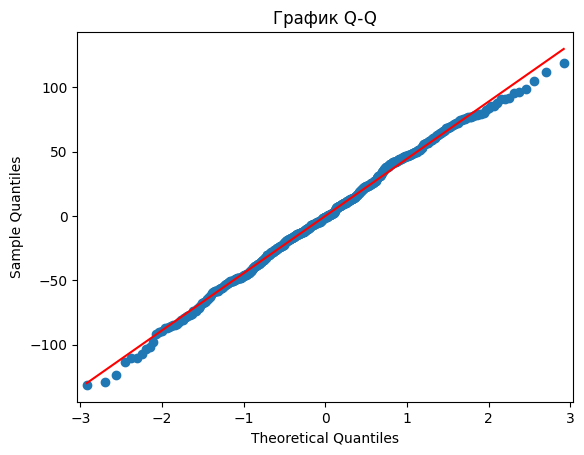

In [ ]:
# Построение Q-Q диаграммы

sm.qqplot(residuals, line='s')
plt.title("График Q-Q")
plt.show()

На предыдущем графике Q-Q точки вплотную примыкают к прямой диагональной линии, имеющей тенденцию к росту. Это подтверждает, что предположение о нормальности выполняется.

### Проверка предположения о независимости наблюдений и однородности дисперсии

Начнем с получения настроенных значений из модели.

In [ ]:
# Получение настроенных значений

fitted_values = model.predict(ols_data["Radio"])

Построим диаграмму рассеяния остатков относительно подогнанных значений.

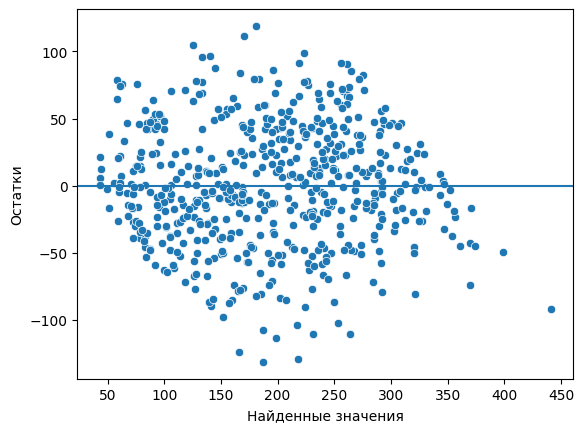

In [ ]:
# Построение диаграммы рассеяния остатков относительно установленных значений

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Найденные значения")
fig.set_ylabel("Остатки")
plt.show()

На предыдущей диаграмме рассеяния точки данных имеют сходство с облаками и не имеют явной закономерности. Таким образом, предположение о независимом наблюдении не нарушено. Учитывая, что остатки имеют случайный характер, предположение о однородности дисперсии, по-видимому, выполняется.

## Заключение

В модели простой линейной регрессии y-пересечение равно 41,5326, а наклон равен 8,1733.
- Одна из интерпретаций: Если компания выделит на продвижение своих товаров/услуг по радио на 1 млн. долларов больше, то ее продажи увеличатся в среднем на 8,1733 млн. долларов.
- Другая интерпретация: Компании, у которых бюджет на продвижение товаров/услуг на радио на 1 млн. долларов больше, увеличивают объем продаж в среднем на 8,1733 млн. долларов.


Полученные результаты являются статистически значимыми с p-value 0,000 что является очень малым значением (и меньше общепринятого уровня значимости 0,05). Это говорит о том, что при истинности нулевой гипотезы существует очень низкая вероятность того, что будут получены данные, столь же экстремальные или более экстремальные, чем этот набор данных. В данном контексте нулевой гипотезой является отсутствие связи между бюджетом на рекламу на радио и продажами, т.е. наклон равен нулю, а альтернативной гипотезой является наличие связи между бюджетом на радиопродвижение и продажами, т.е. наклон не равен нулю. Таким образом, можно отвергнуть нулевую гипотезу и утверждать, что существует связь между бюджетом на радиопродвижение и продажами для компании, представленных в этих данных.

Наклон линии наилучшего соответствия, полученный в результате построения регрессионной модели, является приблизительным и подвержен неопределенности (не является точным значением). 95%-ный доверительный интервал для наклона составляет от 7,791 до 8,555. Это означает, что с вероятностью 95% интервал [7,791, 8,555] содержит истинное значение наклона.